In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:31,  3.69it/s]


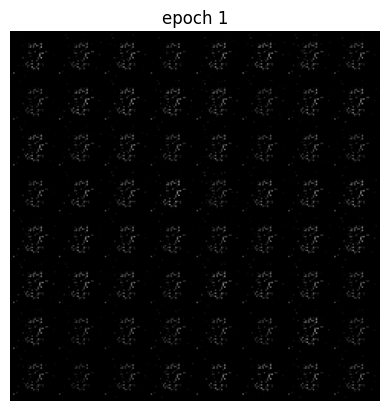

Epoch 1 of 100
Generator loss: 1.43818367, Discriminator loss: 0.84567682


118it [00:25,  4.60it/s]


Epoch 2 of 100
Generator loss: 3.33510065, Discriminator loss: 1.42293506


118it [00:25,  4.64it/s]


Epoch 3 of 100
Generator loss: 6.45221901, Discriminator loss: 0.14209282


118it [00:24,  4.81it/s]


Epoch 4 of 100
Generator loss: 6.27339506, Discriminator loss: 0.50837737


118it [00:27,  4.35it/s]


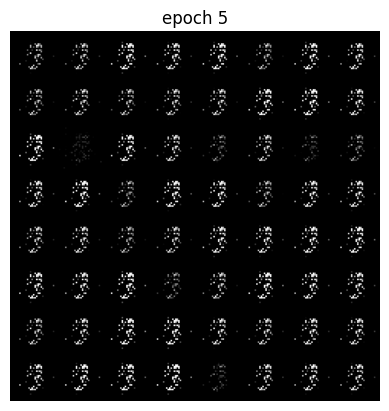

Epoch 5 of 100
Generator loss: 6.39558458, Discriminator loss: 0.33598422


118it [00:25,  4.55it/s]


Epoch 6 of 100
Generator loss: 6.96337318, Discriminator loss: 0.43393921


118it [00:25,  4.59it/s]


Epoch 7 of 100
Generator loss: 5.10049009, Discriminator loss: 0.41260529


118it [00:25,  4.57it/s]


Epoch 8 of 100
Generator loss: 3.85194731, Discriminator loss: 0.72511513


118it [00:25,  4.67it/s]


Epoch 9 of 100
Generator loss: 4.06821585, Discriminator loss: 0.63593709


118it [00:24,  4.73it/s]


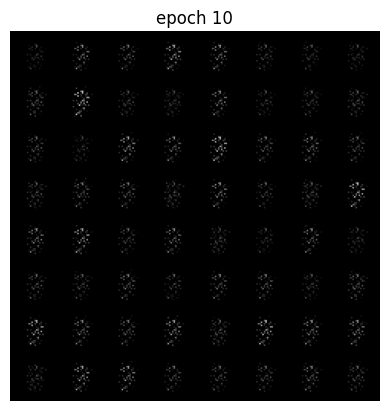

Epoch 10 of 100
Generator loss: 3.19858909, Discriminator loss: 0.64624214


118it [00:25,  4.55it/s]


Epoch 11 of 100
Generator loss: 2.70409989, Discriminator loss: 0.76412304


118it [00:25,  4.56it/s]


Epoch 12 of 100
Generator loss: 2.53101015, Discriminator loss: 0.87117326


118it [00:26,  4.54it/s]


Epoch 13 of 100
Generator loss: 1.90150082, Discriminator loss: 0.82748245


118it [00:26,  4.51it/s]


Epoch 14 of 100
Generator loss: 2.52213597, Discriminator loss: 0.55595507


118it [00:25,  4.68it/s]


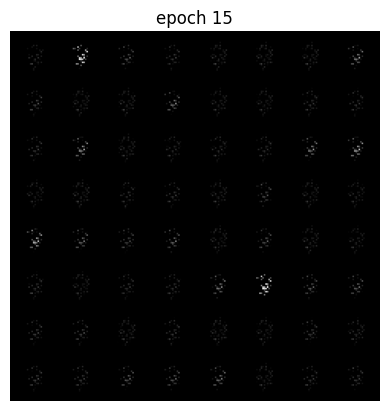

Epoch 15 of 100
Generator loss: 2.82354808, Discriminator loss: 0.49844340


118it [00:25,  4.64it/s]


Epoch 16 of 100
Generator loss: 3.60041666, Discriminator loss: 0.30105679


118it [00:25,  4.56it/s]


Epoch 17 of 100
Generator loss: 4.09086227, Discriminator loss: 0.25272735


118it [00:26,  4.52it/s]


Epoch 18 of 100
Generator loss: 4.58785582, Discriminator loss: 0.24817706


118it [00:26,  4.48it/s]


Epoch 19 of 100
Generator loss: 4.75201416, Discriminator loss: 0.28031686


118it [00:25,  4.54it/s]


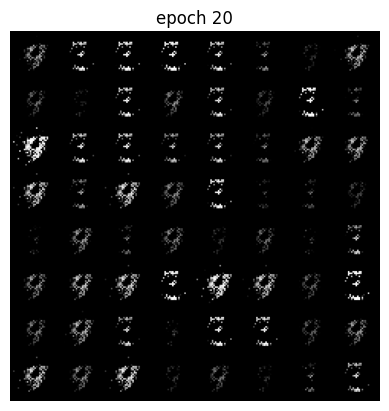

Epoch 20 of 100
Generator loss: 5.26889133, Discriminator loss: 0.34674122


118it [00:25,  4.57it/s]


Epoch 21 of 100
Generator loss: 4.35631800, Discriminator loss: 0.38475840


118it [00:25,  4.62it/s]


Epoch 22 of 100
Generator loss: 4.22798204, Discriminator loss: 0.28366791


118it [00:26,  4.53it/s]


Epoch 23 of 100
Generator loss: 3.96930742, Discriminator loss: 0.37673590


118it [00:26,  4.48it/s]


Epoch 24 of 100
Generator loss: 3.77519917, Discriminator loss: 0.47539048


118it [00:26,  4.46it/s]


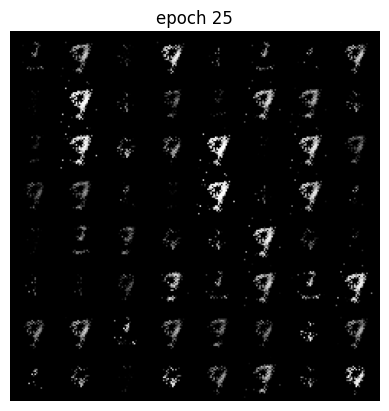

Epoch 25 of 100
Generator loss: 3.84307075, Discriminator loss: 0.35070564


118it [00:26,  4.49it/s]


Epoch 26 of 100
Generator loss: 3.76239133, Discriminator loss: 0.36036908


118it [00:26,  4.45it/s]


Epoch 27 of 100
Generator loss: 4.08169365, Discriminator loss: 0.44912914


118it [00:25,  4.61it/s]


Epoch 28 of 100
Generator loss: 3.85489893, Discriminator loss: 0.38309463


118it [00:25,  4.55it/s]


Epoch 29 of 100
Generator loss: 3.64093256, Discriminator loss: 0.42258441


118it [00:26,  4.46it/s]


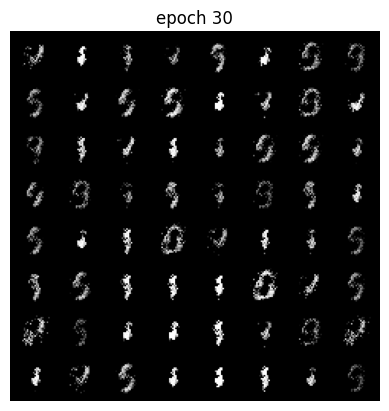

Epoch 30 of 100
Generator loss: 2.96772599, Discriminator loss: 0.57830532


118it [00:26,  4.48it/s]


Epoch 31 of 100
Generator loss: 3.60145664, Discriminator loss: 0.42092045


118it [00:26,  4.46it/s]


Epoch 32 of 100
Generator loss: 3.03796554, Discriminator loss: 0.50512001


118it [00:26,  4.49it/s]


Epoch 33 of 100
Generator loss: 2.97559428, Discriminator loss: 0.50434257


118it [00:25,  4.54it/s]


Epoch 34 of 100
Generator loss: 2.86842227, Discriminator loss: 0.54640841


118it [00:25,  4.66it/s]


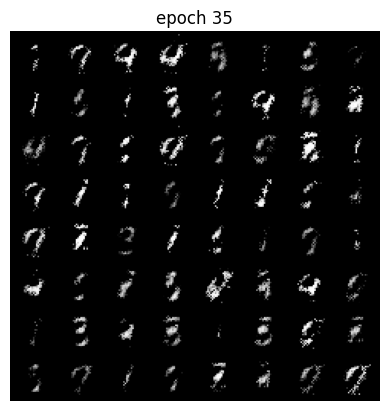

Epoch 35 of 100
Generator loss: 2.66489601, Discriminator loss: 0.60008708


118it [00:26,  4.46it/s]


Epoch 36 of 100
Generator loss: 2.39018655, Discriminator loss: 0.65591722


118it [00:26,  4.48it/s]


Epoch 37 of 100
Generator loss: 2.90150356, Discriminator loss: 0.53381415


118it [00:26,  4.45it/s]


Epoch 38 of 100
Generator loss: 3.06938577, Discriminator loss: 0.42545347


118it [00:34,  3.37it/s]


Epoch 39 of 100
Generator loss: 3.00053596, Discriminator loss: 0.53827694


118it [00:26,  4.53it/s]


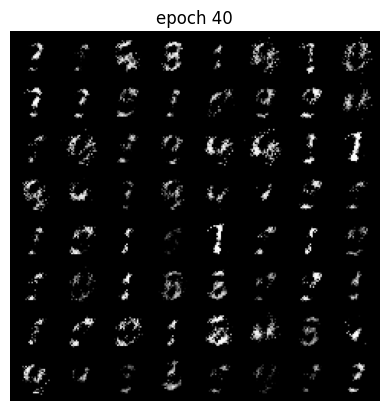

Epoch 40 of 100
Generator loss: 3.19300914, Discriminator loss: 0.46069524


118it [00:26,  4.48it/s]


Epoch 41 of 100
Generator loss: 2.94541240, Discriminator loss: 0.48633774


118it [00:26,  4.47it/s]


Epoch 42 of 100
Generator loss: 3.19957113, Discriminator loss: 0.54846504


118it [00:28,  4.17it/s]


Epoch 43 of 100
Generator loss: 2.80641437, Discriminator loss: 0.60742378


118it [00:26,  4.45it/s]


Epoch 44 of 100
Generator loss: 2.64617562, Discriminator loss: 0.64796476


118it [00:26,  4.48it/s]


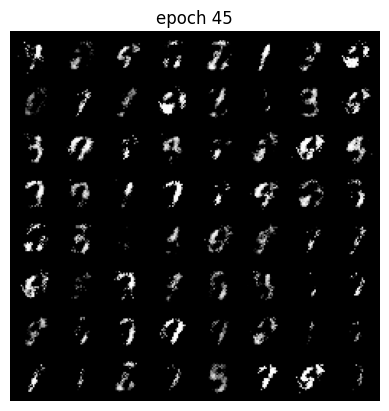

Epoch 45 of 100
Generator loss: 2.54253149, Discriminator loss: 0.61754325


118it [00:26,  4.54it/s]


Epoch 46 of 100
Generator loss: 2.29448605, Discriminator loss: 0.72702648


118it [00:26,  4.53it/s]


Epoch 47 of 100
Generator loss: 2.45108843, Discriminator loss: 0.61239094


118it [00:26,  4.45it/s]


Epoch 48 of 100
Generator loss: 2.29897881, Discriminator loss: 0.70896400


118it [00:26,  4.47it/s]


Epoch 49 of 100
Generator loss: 2.15715742, Discriminator loss: 0.72692555


118it [00:26,  4.44it/s]


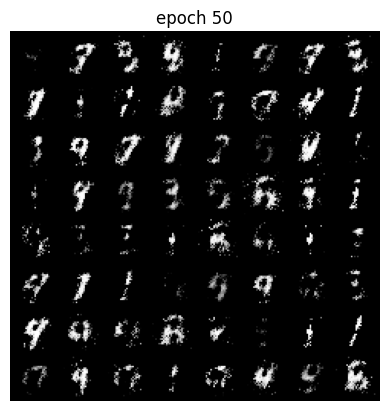

Epoch 50 of 100
Generator loss: 2.49031782, Discriminator loss: 0.62550594


118it [00:26,  4.47it/s]


Epoch 51 of 100
Generator loss: 2.51100183, Discriminator loss: 0.66063001


118it [00:26,  4.49it/s]


Epoch 52 of 100
Generator loss: 2.33632255, Discriminator loss: 0.65259697


118it [00:26,  4.54it/s]


Epoch 53 of 100
Generator loss: 2.28624010, Discriminator loss: 0.65732636


118it [00:26,  4.50it/s]


Epoch 54 of 100
Generator loss: 2.08699441, Discriminator loss: 0.73915569


118it [00:26,  4.45it/s]


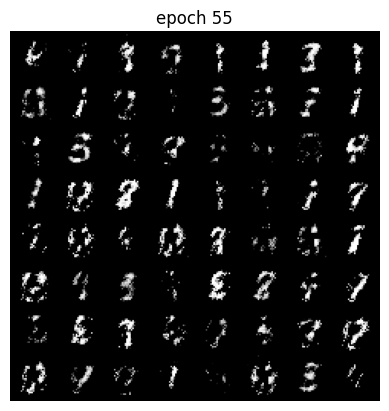

Epoch 55 of 100
Generator loss: 2.05761361, Discriminator loss: 0.75451864


118it [00:26,  4.41it/s]


Epoch 56 of 100
Generator loss: 2.26072955, Discriminator loss: 0.69279610


118it [00:26,  4.45it/s]


Epoch 57 of 100
Generator loss: 2.38443065, Discriminator loss: 0.61436912


118it [00:26,  4.46it/s]


Epoch 58 of 100
Generator loss: 2.25266838, Discriminator loss: 0.69762183


118it [00:26,  4.46it/s]


Epoch 59 of 100
Generator loss: 2.07351518, Discriminator loss: 0.78208237


118it [00:25,  4.56it/s]


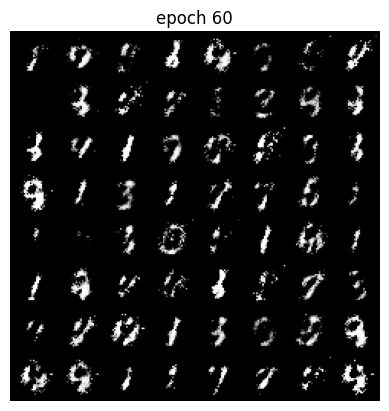

Epoch 60 of 100
Generator loss: 2.03988028, Discriminator loss: 0.76254304


118it [00:26,  4.47it/s]


Epoch 61 of 100
Generator loss: 2.00444221, Discriminator loss: 0.77231369


118it [00:26,  4.42it/s]


Epoch 62 of 100
Generator loss: 1.82672250, Discriminator loss: 0.84370588


118it [00:26,  4.41it/s]


Epoch 63 of 100
Generator loss: 1.94181550, Discriminator loss: 0.79357165


118it [00:26,  4.46it/s]


Epoch 64 of 100
Generator loss: 1.90746701, Discriminator loss: 0.81381957


118it [00:26,  4.41it/s]


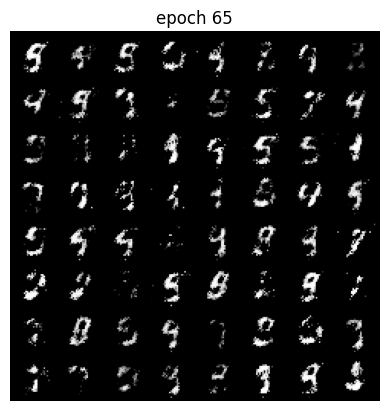

Epoch 65 of 100
Generator loss: 2.00526977, Discriminator loss: 0.78494640


118it [00:26,  4.45it/s]


Epoch 66 of 100
Generator loss: 1.96758974, Discriminator loss: 0.79987227


118it [00:26,  4.51it/s]


Epoch 67 of 100
Generator loss: 1.92161834, Discriminator loss: 0.78424609


118it [00:26,  4.52it/s]


Epoch 68 of 100
Generator loss: 1.99312675, Discriminator loss: 0.77023827


118it [00:26,  4.41it/s]


Epoch 69 of 100
Generator loss: 2.01419020, Discriminator loss: 0.76744865


118it [00:26,  4.40it/s]


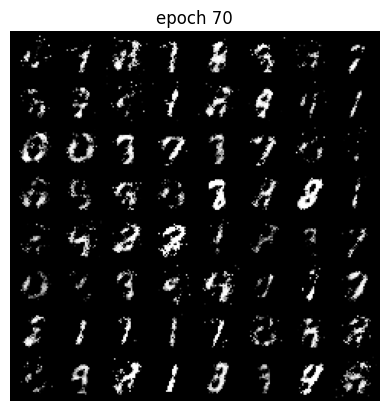

Epoch 70 of 100
Generator loss: 2.14009094, Discriminator loss: 0.74380514


118it [00:26,  4.43it/s]


Epoch 71 of 100
Generator loss: 2.12128615, Discriminator loss: 0.75882542


118it [00:26,  4.43it/s]


Epoch 72 of 100
Generator loss: 1.98177946, Discriminator loss: 0.80109727


118it [00:26,  4.48it/s]


Epoch 73 of 100
Generator loss: 1.81232274, Discriminator loss: 0.87088885


118it [00:25,  4.57it/s]


Epoch 74 of 100
Generator loss: 1.78234899, Discriminator loss: 0.82954197


118it [00:26,  4.48it/s]


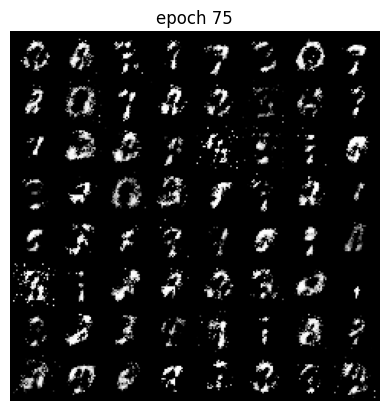

Epoch 75 of 100
Generator loss: 1.82978833, Discriminator loss: 0.84251325


118it [00:26,  4.41it/s]


Epoch 76 of 100
Generator loss: 1.92465842, Discriminator loss: 0.82358900


118it [00:26,  4.41it/s]


Epoch 77 of 100
Generator loss: 1.87140942, Discriminator loss: 0.84470275


118it [00:26,  4.40it/s]


Epoch 78 of 100
Generator loss: 1.81717420, Discriminator loss: 0.85370777


118it [00:26,  4.38it/s]


Epoch 79 of 100
Generator loss: 1.88547599, Discriminator loss: 0.82203352


118it [00:26,  4.47it/s]


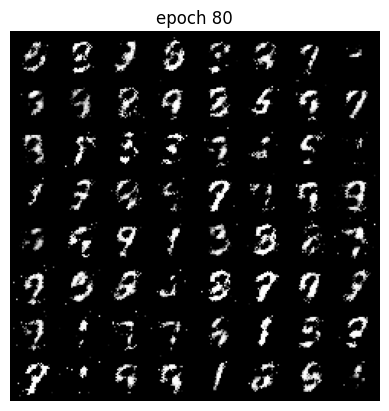

Epoch 80 of 100
Generator loss: 1.90433717, Discriminator loss: 0.81189420


118it [00:26,  4.47it/s]


Epoch 81 of 100
Generator loss: 2.01529074, Discriminator loss: 0.80994419


118it [00:26,  4.44it/s]


Epoch 82 of 100
Generator loss: 1.85694373, Discriminator loss: 0.82933293


118it [00:26,  4.39it/s]


Epoch 83 of 100
Generator loss: 1.89381051, Discriminator loss: 0.82841194


118it [00:26,  4.39it/s]


Epoch 84 of 100
Generator loss: 1.84644699, Discriminator loss: 0.85259726


118it [00:26,  4.43it/s]


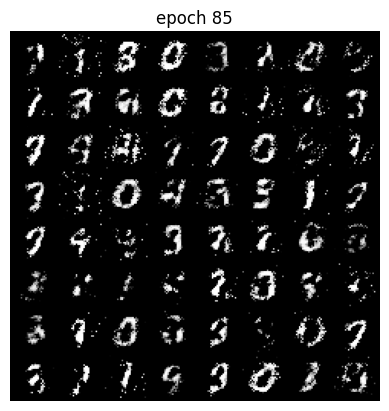

Epoch 85 of 100
Generator loss: 1.72600675, Discriminator loss: 0.86499368


118it [00:26,  4.37it/s]


Epoch 86 of 100
Generator loss: 1.99108481, Discriminator loss: 0.83272129


118it [00:26,  4.40it/s]


Epoch 87 of 100
Generator loss: 1.80282009, Discriminator loss: 0.83761325


118it [00:25,  4.55it/s]


Epoch 88 of 100
Generator loss: 1.68932724, Discriminator loss: 0.87083922


118it [00:26,  4.47it/s]


Epoch 89 of 100
Generator loss: 1.76341403, Discriminator loss: 0.86999974


118it [00:26,  4.41it/s]


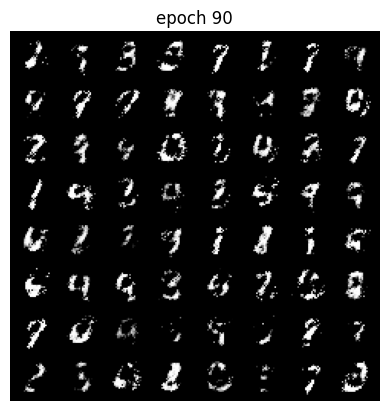

Epoch 90 of 100
Generator loss: 1.95459569, Discriminator loss: 0.80473406


118it [00:27,  4.36it/s]


Epoch 91 of 100
Generator loss: 1.95415747, Discriminator loss: 0.81825262


118it [00:26,  4.41it/s]


Epoch 92 of 100
Generator loss: 1.60219085, Discriminator loss: 0.88319511


118it [00:27,  4.35it/s]


Epoch 93 of 100
Generator loss: 1.69898832, Discriminator loss: 0.92522096


118it [00:26,  4.38it/s]


Epoch 94 of 100
Generator loss: 1.86708462, Discriminator loss: 0.84123786


118it [00:25,  4.58it/s]


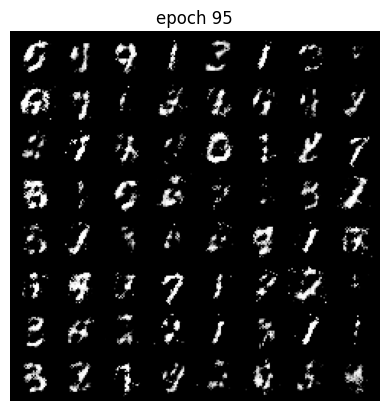

Epoch 95 of 100
Generator loss: 1.54475725, Discriminator loss: 0.93620971


118it [00:26,  4.43it/s]


Epoch 96 of 100
Generator loss: 1.60589886, Discriminator loss: 0.90920271


118it [00:27,  4.26it/s]


Epoch 97 of 100
Generator loss: 1.80345488, Discriminator loss: 0.86289111


118it [00:26,  4.40it/s]


Epoch 98 of 100
Generator loss: 1.70303059, Discriminator loss: 0.88442347


118it [00:27,  4.35it/s]


Epoch 99 of 100
Generator loss: 1.66179872, Discriminator loss: 0.89668318


118it [00:27,  4.36it/s]


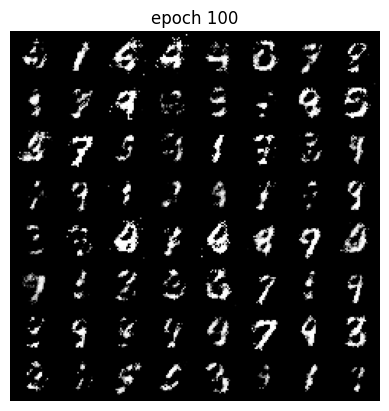

Epoch 100 of 100
Generator loss: 1.75558352, Discriminator loss: 0.84655879


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    # fake_labels = torch.ones_like(logits_fake, device=logits_fake.device)
    # loss = nn.functional.binary_cross_entropy_with_logits(logits_fake, fake_labels, reduction='mean')
    # print(true_label)
    loss = criterion(output, true_label)
    loss.backward()

    return loss
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    # real_labels = torch.ones_like(logits_real, device=logits_real.device)
    # real_loss = nn.functional.binary_cross_entropy_with_logits(logits_real, real_labels, reduction='mean')
    loss = criterion(output, true_label)
    loss.backward()

    # fake_labels = torch.zeros_like(logits_fake, device=logits_fake.device)
    # fake_loss = nn.functional.binary_cross_entropy_with_logits(logits_fake, fake_labels, reduction='mean')
    # loss = (real_loss + fake_loss)

    return loss
    ######################################

def discriminator_loss(true_output, real_labels, fake_output, fake_labels):
    ############ YOUR CODE HERE ##########

    # real_labels = torch.ones_like(logits_real, device=logits_real.device)
    # real_loss = nn.functional.binary_cross_entropy_with_logits(logits_real, real_labels, reduction='mean')
    real_loss = criterion(true_output, real_labels)

    # fake_labels = torch.zeros_like(logits_fake, device=logits_fake.device)
    fake_loss = criterion(fake_output, fake_labels)
    real_loss.backward()
    fake_loss.backward()
    loss = (real_loss + fake_loss)

    return loss
    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########


        ####### MY PREPROCESSING CODE #######


        # data[0] is 512 x 1 x 28 x 28, 512 black and white 28 x 28 images
        # data[1] is 512, 512 labels

        d_total_error = None
        # pre-process data
        all_images = data[0]
        all_labels = data[1]
        all_images = all_images.to(device)

        # normalized_image = (((all_images - torch.min(all_images)) / torch.max(all_images)) * 2) - 1

        # randomly sample 64 indices WITHOUT replacement
        real_image_sample_indices = np.random.choice(all_images.shape[0], sample_size, replace = False)
        minibatch_real_data = all_images[real_image_sample_indices, :, :, :]
        minibatch_real_labels = all_labels[real_image_sample_indices]


        ####### END OF MY PREPROCESSING CODE #######

        ####### MY DISCRIMINATOR CODE #######


        optim_d.zero_grad()
        # reshaped_minibatch_real_data = minibatch_real_data.reshape(minibatch_real_data.shape[0], -1)
        reshaped_minibatch_real_data = minibatch_real_data
        real_image_discriminator_output = discriminator(reshaped_minibatch_real_data)

        noise = create_noise(sample_size, nz)
        fake_images = generator(noise)
        # TODO: this reshape might not be right - not sure if need to reshape
        # to [batch_size, 1, 28, 28] and then flatten?
        fake_image_discriminator_output = discriminator(fake_images.reshape(reshaped_minibatch_real_data.shape[0], -1))

        real_labels = label_real(sample_size)
        fake_labels = label_fake(sample_size)

        loss_d += discriminator_loss(real_image_discriminator_output, real_labels, fake_image_discriminator_output, fake_labels).item()
        # loss_d.backward()
        optim_d.step()


        ####### END OF MY DISCRIMINATOR CODE #######

        ####### MY GENERATOR CODE #######


        g_error = None
        fake_images = None

        optim_g.zero_grad()
        noise = create_noise(sample_size, nz)
        fake_images = generator(noise)
        fake_image_discriminator_output = discriminator(fake_images.reshape(reshaped_minibatch_real_data.shape[0], -1))
        loss_g += generator_loss(fake_image_discriminator_output, real_labels)
        # loss_g.backward()
        optim_g.step()


        ####### END OF MY GENERATOR CODE #######


        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

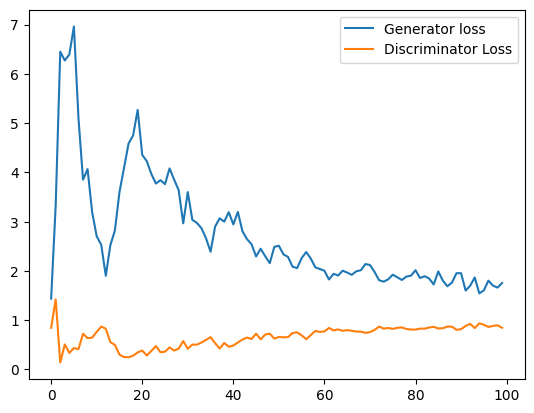

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot([val.detach().numpy() for val in losses_g], label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')